# **Fraud detection using labeled data**

---
by GUIDJIME ADINSI Ahouahounko

## Data : Credit card Dataset
The dataset is avalaible on kaggle.


## Libraries and packages

In [ ]:
# Packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler


import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Packages for model evaluation and classification models

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Packages for saving the model

from pickle import dump
from pickle import load

import warnings
warnings.simplefilter("ignore", UserWarning)

# Package for google colab management

from google.colab import drive

In [ ]:
# Setting up the drive folder to allow us to retrieve our dataset
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard_sampledata.csv")
data.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0


In [ ]:
data = data.drop(['Unnamed: 0','Time', 'Amount'], axis=1)
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,...,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,0
1,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,...,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,0
2,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,...,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,0


## Exploratory data analysis

### Desciptive statistics

The first thing we need to do is get a basic understanding of our data. Remember that, except for the transaction and amount, we do not know the names of the other columns. The only thing we know is that the values of those columns have been scaled. Let's take a look at the shape and columns of the data:

In [ ]:
data.shape

(8000, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      8000 non-null   float64
 1   V2      8000 non-null   float64
 2   V3      8000 non-null   float64
 3   V4      8000 non-null   float64
 4   V5      8000 non-null   float64
 5   V6      8000 non-null   float64
 6   V7      8000 non-null   float64
 7   V8      8000 non-null   float64
 8   V9      8000 non-null   float64
 9   V10     8000 non-null   float64
 10  V11     8000 non-null   float64
 11  V12     8000 non-null   float64
 12  V13     8000 non-null   float64
 13  V14     8000 non-null   float64
 14  V15     8000 non-null   float64
 15  V16     8000 non-null   float64
 16  V17     8000 non-null   float64
 17  V18     8000 non-null   float64
 18  V19     8000 non-null   float64
 19  V20     8000 non-null   float64
 20  V21     8000 non-null   float64
 21  V22     8000 non-null   float64
 22  

This dataset contains **8000 rows** and **32 columns**. The columns are *time*, *V1* to *V28*, *Amount*, *Class*.

As shown, the variable names are not very descriptive (V1, V2, etc.). Furthermore, the data type for the entire dataset is float, except for the Class variable, which is of type integer.

The Class variable is binary. It labels each observation as **fraudulent** (1) or **non-fraudulent** (0).

In [ ]:
data.Class.value_counts(normalize = True)*100
# Counter(data['Class'])

0    99.7875
1     0.2125
Name: Class, dtype: float64

In [ ]:
class_names = {0:'Not fraud', 1: 'Fraud'}
data.Class.value_counts(normalize = True).rename(index = class_names)
# data['Class'].value_counts().plot(kind = 'bar', color = ['blue', 'orange'])

Not fraud    0.997875
Fraud        0.002125
Name: Class, dtype: float64

Notice the **marked imbalance** in data labels. Most transactions are not fraudulent. If we use this dataset as a basis for our model, most models might not emphasize fraud signals enough;

We will explore some ways to address this issue in the following sections.

### Data visualization

Since feature descriptions are not provided, visualizing the data will not lead to much insight. This step will be skipped in this case study.

## Data preprocessing

Data with no missing values. We also have non-categorical data that is already standardized.

In [ ]:
data.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

## Models implementation

### Train-Test split


In [ ]:
Y = data['Class']
X = data.loc[:, data.columns != 'Class']

test_size = 0.2
seed = 8

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed, stratify= Y)

### Checking models

In [ ]:
num_folds = 10
scoring = 'f1'

Let's create a performance baseline for this problem and perform a quick check on several different algorithms. The selected algorithms include:

1. Linear Algorithms

**Logistic Regression** (LR) and **Linear Discriminant Analysis** (LDA).

2. Nonlinear Algorithms

**Classification and Regression Trees** (CART) and **K-Nearest Neighbors** (KNN).

3. Boosting methods

**AdaBoost** and **GradientBoosting**

4. Bagging methods

**Random Forest**, **Extra Trees Classifier**



In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))


# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.133333 (0.266667)
LDA: 0.416667 (0.359398)
KNN: 0.357143 (0.372069)
CART: 0.195238 (0.338363)
NB: 0.097421 (0.096198)
SVM: 0.000000 (0.000000)
AB: 0.233333 (0.366667)
GBM: 0.200000 (0.305505)
RF: 0.100000 (0.213437)
ET: 0.200000 (0.305505)


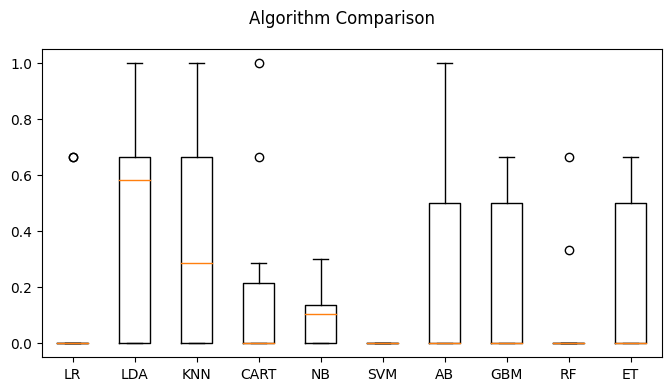

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()


Focusing on the median, let's make predictions using **Linear Discriminant Analysis** (LDA).

In [ ]:
model0 = LinearDiscriminantAnalysis()
model0.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Some metrics
predictions = model0.predict(X_test)
print("F1-score: ",f1_score(Y_test, predictions))
print("Roc auc score", roc_auc_score(Y_test, predictions))
print(classification_report(Y_test, predictions ))

F1-score:  0.8571428571428571
Roc auc score 0.9996869129618035
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1597
           1       0.75      1.00      0.86         3

    accuracy                           1.00      1600
   macro avg       0.88      1.00      0.93      1600
weighted avg       1.00      1.00      1.00      1600



<Axes: xlabel='Predicted', ylabel='Actual'>

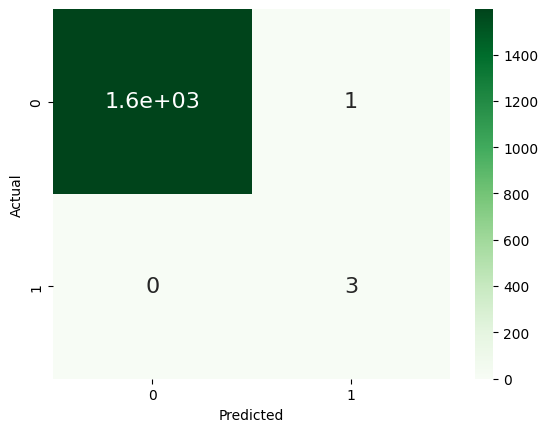

In [ ]:
# Confusion matrix

df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 16})


### Balancing the dataset with(Undersampling)

In [ ]:
# Train-test split

X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 8, stratify = Y )

Before Random UnderSampling:  Counter({0: 6386, 1: 14})
After Random UnderSampling:  Counter({0: 14, 1: 14})


<Axes: title={'center': 'Count (Class)'}>

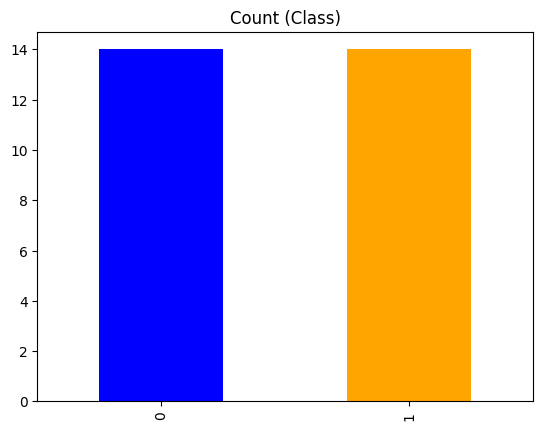

In [ ]:
# Undersampling

random_under = RandomUnderSampler()
X_train_new, Y_train_new = random_under.fit_resample(X_train,Y_train)

# Check class distribution after resampling

print("Before Random UnderSampling: ", Counter(Y_train))
print("After Random UnderSampling: ", Counter(Y_train_new))

Y_train_new.value_counts().plot(kind='bar', title='Count (Class)', color = ['blue', 'orange'])

In [ ]:
# Modelisation

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = num_folds)
  cv_results = cross_val_score(model, X_train_new, Y_train_new, cv = kfold, scoring = scoring )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.410000 (0.343851)
LDA: 0.383333 (0.408588)
KNN: 0.410000 (0.343851)
CART: 0.476667 (0.412593)
NB: 0.460000 (0.386954)
SVM: 0.443333 (0.381241)
AB: 0.493333 (0.416547)
GBM: 0.476667 (0.412593)
RF: 0.430000 (0.370720)
ET: 0.410000 (0.343851)


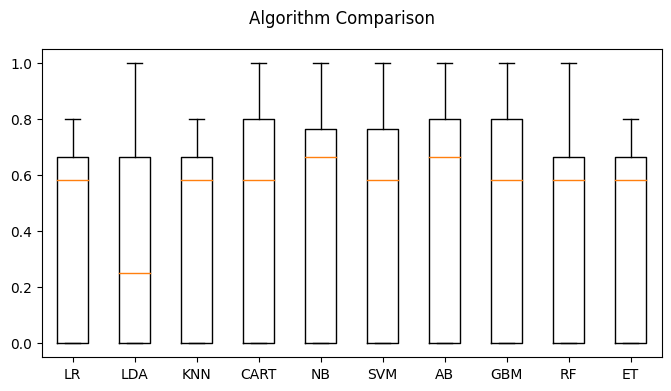

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()


### Balancing the dataset with(Oversampling)




In [ ]:
from imblearn.over_sampling import SMOTE

smote_over = SMOTE()
X_nex, Y_nex = smote_over.fit_resample(X_train,Y_train)

In [ ]:
results = []
names = []
for name, model in models:
        kfold = KFold(n_splits=num_folds,shuffle=True )
        cv_results = cross_val_score(model, X_nex, Y_nex, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.939563 (0.007735)
LDA: 0.911238 (0.009160)
KNN: 0.995803 (0.002202)
CART: 0.996944 (0.001095)
NB: 0.697565 (0.018114)
SVM: 0.993936 (0.001518)
AB: 0.995626 (0.001539)
GBM: 0.998276 (0.001547)
RF: 0.999692 (0.000378)
ET: 0.999845 (0.000310)


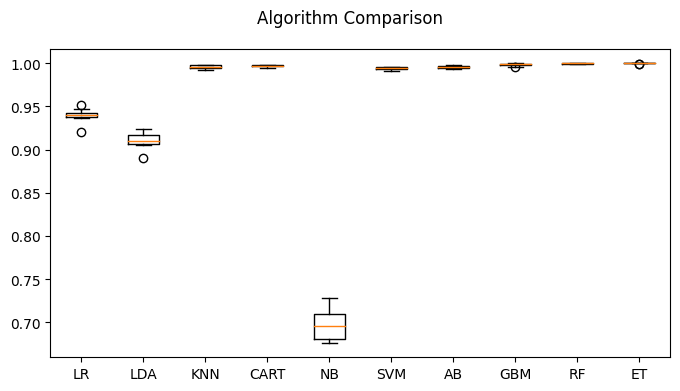

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

#### Modèle 1

In [ ]:
model1 = ExtraTreesClassifier()
model1.fit(X_nex, Y_nex)

ExtraTreesClassifier()

In [ ]:
# Some metrics
predictions = model1.predict(X_test)
print("F1-score: ",f1_score(Y_test, predictions))
print("Roc auc score", roc_auc_score(Y_test, predictions))
print(classification_report(Y_test, predictions ))

F1-score:  0.6666666666666666
Roc auc score 0.8330202462951367
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1597
           1       0.67      0.67      0.67         3

    accuracy                           1.00      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       1.00      1.00      1.00      1600



<Axes: xlabel='Predicted', ylabel='Actual'>

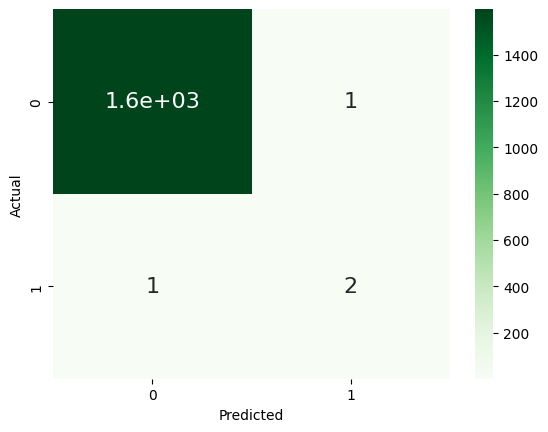

In [ ]:
# Confusion matrix

df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 16})


### Modèle 2

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_nex, Y_nex)

RandomForestClassifier()

In [ ]:
# Some metrics
predictions = model2.predict(X_test)
print("F1-score: ",f1_score(Y_test, predictions))
print("Roc auc score", roc_auc_score(Y_test, predictions))
print(classification_report(Y_test, predictions ))

F1-score:  0.8571428571428571
Roc auc score 0.9996869129618035
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1597
           1       0.75      1.00      0.86         3

    accuracy                           1.00      1600
   macro avg       0.88      1.00      0.93      1600
weighted avg       1.00      1.00      1.00      1600



<Axes: xlabel='Predicted', ylabel='Actual'>

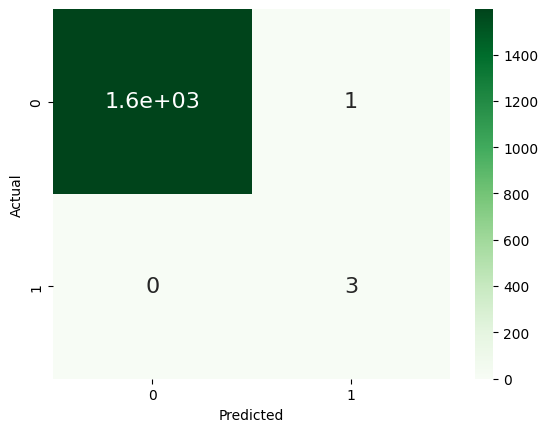

In [ ]:
# Confusion matrix

df_cm = pd.DataFrame(confusion_matrix(Y_test, predictions), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 10})


## Conclusion:


For more follow me!

GUIDJIME ADINSI Ahouahounko
Data Scientist At Abeille Assurance.